# EE 313 Spring 2024: Lab4
## Post date: 03/20/2024, **Due date: 03/29/2024, 11:59pm**

Prof. Jon Tamir

TA: Asad Aali

In [534]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1. Fourier Series
For a real-valued periodic signal $x(t)$ with period $T=\frac{2\pi}{\omega}$, we can write it as a fourier series
$$ x(t) = a_0 + \sum_{k=1}^{\infty} 2 \mathrm{Re}\left\{a_ke^{jk\frac{2\pi}{T}t}\right\} $$
where $a_k$ are the complex-valued Fourier series coefficients:
$$ a_k = \frac{1}{T} \int_{T} x(t)e^{-jk\frac{2\pi}{T}t}  dt $$

Basically, what we aim to achieve while using the Fourier Series is to approximate the desired signal by finite number of Fourier series (harmonic) coefficients. We will start from basic waves that can be implemented and used to make other waves. The basic waves include: Square waves, Sawtooth waves, and Triangular waves.

Your task is to approximate the given simple waves with a Fourier series consisting of $N$ coefficients, so that the approximation error of one period is smaller than .1 The approximation error that we will use is the normalized root mean squared error, defined as

$$\mathrm{NRMSE}\left(\hat{x}_N(t), x(t)\right) = \frac{\sqrt{ \int \left(\hat{x}_N(t) - x(t)\right)^2} dt}{\sqrt{ \int \left(x(t)\right)^2} dt}, $$
where $\hat x_N(t)$ is the approximation of $x(t)$ using $N$ Fourier series coefficients, i.e.

$$ \hat{x}_N(t) = a_0 + \sum_{k=1}^{N-1} 2\mathrm{Re}\left\{a_ke^{jk\frac{2\pi}{T}t}\right\} $$


Remember that the integral of the multiplication of two signals is related to the inner product. Here, we are squaring an error signal, which is the same as multiplying it with itself. Therefore, this is an inner product.  Since we are working with digital representations of the continuous-time signal, we can therefore take a conventional discrete dot product. By also dividing by the energy in the original signal, we are creating a percent error. Thus, 0.1 is about 10% error

You will need to experiment with the number of coefficients, $N$, required to make the error small enough.

First calculate the coefficients $a_k$, then synthesize the signal using these coefficients, and finally calculate the error.

In [535]:
import numpy as np
from scipy.signal import square, sawtooth, triang
import matplotlib.pyplot as plt
from scipy.integrate import simps
%matplotlib inline

ImportError: cannot import name 'triang' from 'scipy.signal' (C:\Spring2024\ECE313\Lab4\untitled\venv\Lib\site-packages\scipy\signal\__init__.py)

In [536]:
# The error function
def approximation_error(true, approx):
  return np.linalg.norm(true - approx) / np.linalg.norm(true)

## An example of approximating square wave by fourier series.
Note: you can use the lambda function [Link](https://realpython.com/python-lambda/) or Simpson's rule [Link](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.simps.html) for numerical integration. A simple integration is based on the Riemman sum


In [537]:
def integral(f, t):
    dt = t[1] - t[0]
    return np.sum(f) * dt

# def integral(f, t):
#     return simps(f, t)

Text(0.5, 1.0, 'Sqaure wave')

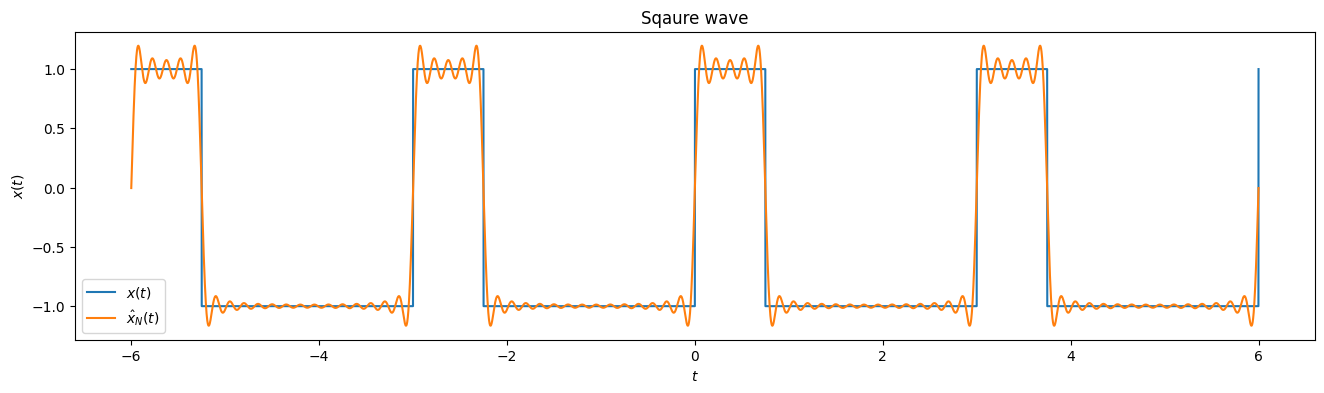

In [538]:
T = 3 
dutycycle = 0.25
samples = 10000
terms = 20 

num_periods = 4
t = np.linspace(-num_periods/2*T, num_periods/2*T, samples)
f = square(2*np.pi/T*t, duty=dutycycle)

# Calculation of Fourier coefficients
# integrate over one period
t1 = t[:samples//num_periods] # one period
f1 = f[:samples//num_periods]
a0 = 1/T * integral(f1, t1)
ak = lambda k: 1/T * integral(f1 * np.exp(-1j*k*2*np.pi/T*t1), t1) # this is a function of k


# sum of the series
k_terms = np.arange(1, terms)
s = a0 + 2 * np.real(np.sum(np.array([ak(k) for k in k_terms])[:,None] * np.exp(1j*k_terms[:,None]*2*np.pi/T*t), 0))

# Plotting
plt.figure(figsize=(16, 4))
plt.plot(t, f, label="$x(t)$")
plt.plot(t, s, label="$\hat{x}_N(t)$")
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.legend(loc='best',prop={'size':10})
plt.title("Sqaure wave")

In [539]:
# print error
err = approximation_error(f, s)
print('Approximation error:', err)

Approximation error: 0.14257547329811668


## Q1a
Use the code above to write a function that approximates a given signal with $N$ Fourier series coefficients. Your function should take the signal, the time axis, the period, and the number $N$ as input, and it should output the approximate signal $\hat{x}_N(t)$. We have written code that extracts one period from the signal and from the time axis

In [540]:
def fourier_approx(f, t, T, N):
    # x -- signal
    # t -- time axis
    # T -- period

    # Calculation of Fourier coefficients
    # integrate over one period
    t_len = t[-1] - t[0]
    samples = len(t)
    num_periods = int(t_len // T)
    t1 = t[:samples//num_periods] # one period
    f1 = f[:samples//num_periods]

    ### TODO your code here
    a0 = 1/T * integral(f1, t1)
    ak = lambda k: 1/T * integral(f1 * np.exp(-1j*k*2*np.pi/T*t1), t1)

    # sum of the series
    k_terms = np.arange(1, terms)
    s = a0 + 2 * np.real(np.sum(np.array([ak(k) for k in k_terms])[:,None] * np.exp(1j*k_terms[:,None]*2*np.pi/T*t), 0))
    return s

Use your function to plot the approximation of the square wave for $N=5$, $N=10$, $N=100$, $N=200$. What is the smallest value of $N$ so that the approximation error $\hat{x}_N(t)$ is less than 10%?

For N=5, approximation error: 0.14257547329811668
For N=10, approximation error: 0.14257547329811668
For N=100, approximation error: 0.14257547329811668
For N=200, approximation error: 0.14257547329811668


Text(0.5, 1.0, 'Sqaure wave')

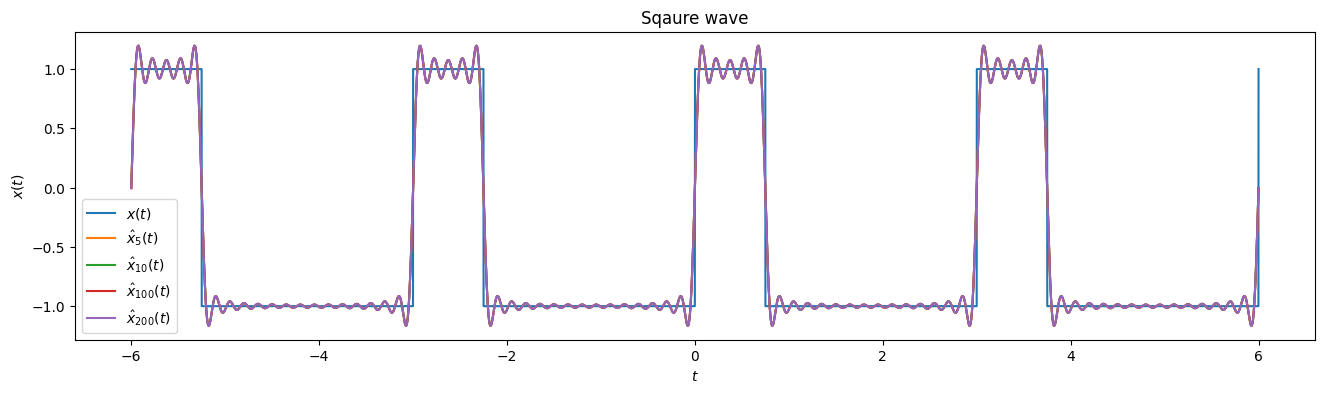

In [541]:
## TODO your code here
s5 = fourier_approx(f, t, T, 5)
s10 = fourier_approx(f, t, T, 10)
s100 = fourier_approx(f, t, T, 100)
s200 = fourier_approx(f, t, T, 200)

N_values = [5, 10, 100, 200]
for N in N_values:
    approx = fourier_approx(f, t, T, N)
    err = approximation_error(f, approx)
    print(f"For N={N}, approximation error: {err}")
    if err < 0.1:
        print(f"Smallest value of N such that the approximation error is less than 10%: {N}")
        break

#plotting code below
plt.figure(figsize=(16, 4))
plt.plot(t, f, label="$x(t)$")
plt.plot(t, s5, label="$\hat{x}_5(t)$")
plt.plot(t, s10, label="$\hat{x}_{10}(t)$")
plt.plot(t, s100, label="$\hat{x}_{100}(t)$")
plt.plot(t, s200, label="$\hat{x}_{200}(t)$")
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.legend(loc='best',prop={'size':10})
plt.title("Sqaure wave")

## Q1b. sawtooth wave
The sawtooth wave is shown below. Your goal is to approximate the function with the smallest number of coefficients so that the error is less than 10%.
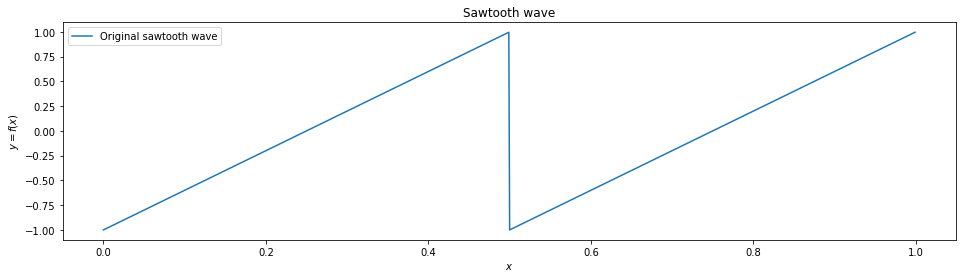

Approximation error: 0.090095577702828


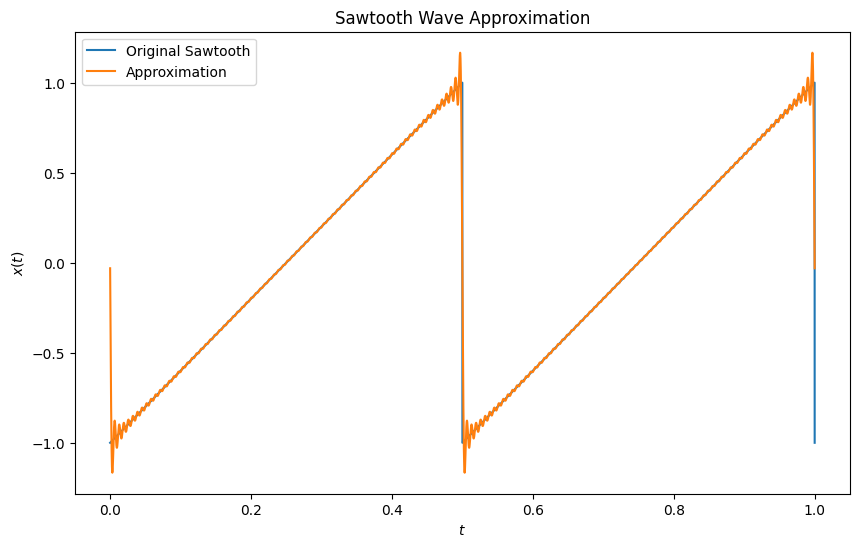

In [542]:
# TODO:
# Determine the parameters
samples=9999

T = 0.5
terms = 78

# TODO:
# Generation of Sawtooth function
t = np.linspace(0, 2*T, samples)
f = sawtooth(2*np.pi*t/T, width=1)

# TODO:
# Approximate the function
s_approx = fourier_approx(f, t, T, terms)

# TODO:
# Calculate and print error
err = approximation_error(f, s_approx)
print('Approximation error:', err)

# TODO:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, f, label="Original Sawtooth")
plt.plot(t, s_approx, label="Approximation")
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.legend()
plt.title("Sawtooth Wave Approximation")
plt.show()


## Q1c. Square wave
Plot the square wave below and find the smallest number $N$ to approximate it with less than 10% error
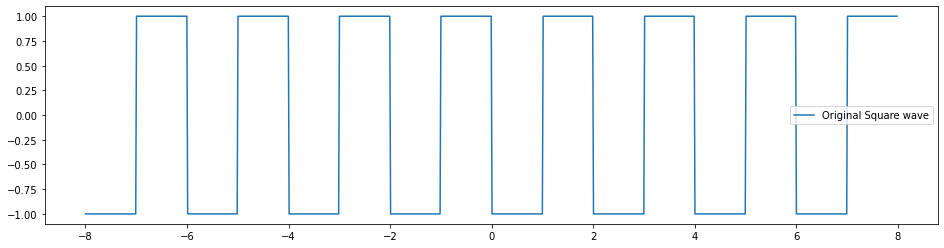

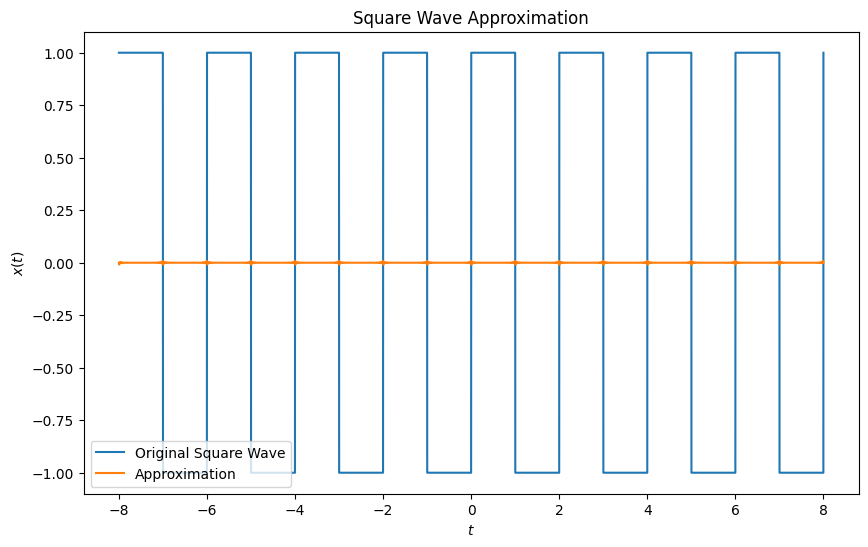

In [543]:
# TODO:
import numpy as np
import matplotlib.pyplot as plt

def integral(f, t):
    """Calculate the integral of a function f over time t."""
    dt = t[1] - t[0]  
    return np.sum(f[:-1] + f[1:]) / 2 * dt

def calculate_coefficients(f1, t1, T, terms):
    """Calculate the Fourier series coefficients."""
    a0 = 1/T * integral(f1, t1)
    ak = lambda k: 1/T * integral(f1 * np.exp(-1j*k*2*np.pi/T*t1), t1)
    return a0, ak

def fourier_series_approximation(a0, ak, t, T, terms):
    """Approximate a function using its Fourier series coefficients."""
    k_terms = np.arange(1, terms)
    s_approx = a0 + 2 * np.real(np.sum(np.array([ak(k) for k in k_terms])[:, None] * np.exp(1j*k_terms[:, None]*2*np.pi/T*t), axis=0))
    return s_approx

# Parameters
samples = 10000
T = 1  
terms = 50  

# Generate the time array
t = np.linspace(-8, 8, samples)

f = np.zeros_like(t)
f[((t % (2 * T)) >= 0) & ((t % (2 * T)) < T)] = 1
f[((t % (2 * T)) >= T) & ((t % (2 * T)) < 2*T)] = -1

t1 = t[:samples//2]  
f1 = f[:samples//2]
a0, ak = calculate_coefficients(f1, t1, T, terms)

s_approx = fourier_series_approximation(a0, ak, t, T, terms)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, f, label="Original Square Wave")
plt.plot(t, s_approx, label="Approximation")
plt.xlabel("$t$")
plt.ylabel("$x(t)$")
plt.legend()
plt.title("Square Wave Approximation")
plt.show()

## Q1d.  Arbitrary wave
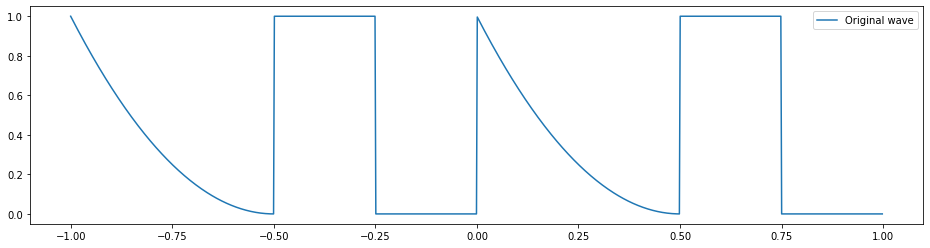
Hint: the wave has two parts: quadratic function $f(x)=x^2$ and square function

Approximation error: 0.06491763558591487


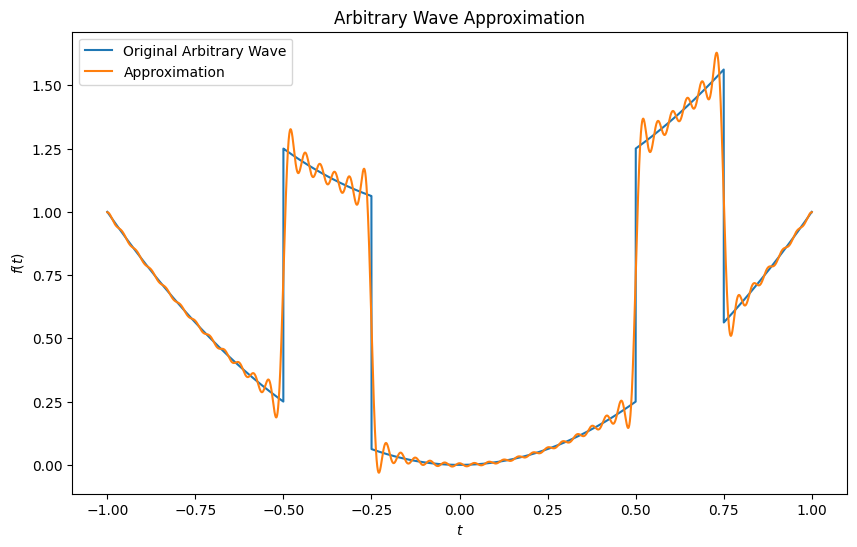

In [544]:
import numpy as np
import matplotlib.pyplot as plt

def integrate_function(func, t):
    return np.trapz(func, t)

def fourier_coefficients(func, t, T, terms):
    a0 = integrate_function(func, t) / T
    ak = lambda k: integrate_function(func * np.exp(-1j * k * 2 * np.pi / T * t), t) / T
    return a0, ak

def construct_fourier_series(a0, ak, t, T, terms):
    return a0 + 2 * np.real(sum(ak(k) * np.exp(1j * k * 2 * np.pi / T * t) for k in range(1, terms)))

def approximation_error(original, approximation):
    return np.sqrt(np.mean((original - approximation)**2))

samples = 10000
T = 2
terms = 50
t = np.linspace(-1, 1, samples)

f = t**2  
f[(t >= -0.5) & (t < -0.25)] += 1 
f[(t >= 0.5) & (t < 0.75)] += 1  

a0, ak = fourier_coefficients(f, t, T, terms)

s_approx = construct_fourier_series(a0, ak, t, T, terms)

err = approximation_error(f, s_approx)
print('Approximation error:', err)

# Plot the original function and its Fourier approximation
plt.figure(figsize=(10, 6))
plt.plot(t, f_quad + f_square, label="Original Arbitrary Wave")
plt.plot(t, s_approx, label="Approximation")
plt.xlabel("$t$")
plt.ylabel("$f(t)$")
plt.legend()
plt.title("Arbitrary Wave Approximation")
plt.show()


# References
[1] Analysis of Fourier series using Python Code. [Link](https://vcfw.org/)  

# Ques 2: Covid Simulation

v1 - Spring 2020: Jon Tamir 

v2 - Fall 2021: Jon Tamir, and Shaohui Liu


This assignment is based off of existing excellent Python modeling and simulation tools developed at the outset of the 2020 COVID-19 outbreak. We will explore some of these details. For more information, see the following projects:

UT Austin COVID-19 Modeling Consortium white paper:

https://sites.cns.utexas.edu/sites/default/files/cid/files/austin_relaxing_social_distancing.pdf?m=1587681780

Prof. Jeffrey Kantor of University of Notre Dame SEIR model

https://github.com/jckantor/covid-19

PhD Student Paul van Gent's COVID-19 simulator:

https://github.com/paulvangentcom/python_corona_simulation

A common use for signals and systems is to develop modeling and forecasting tools for existing biophysical phenomena. When approaching these problems, many of the tools we have developed in the class (and together with Probability, EE 351K), can be used for these goals. In these cases, we typically have observations (or data), and wish to fit this data to our model. When approaching these problems, there are in general two approaches to take.

1. Develop a mathematical model that expresses `y[n]` in terms of `x[n]`, and fit the existing data to the model
2. Develop a simulation environment that models interactions and use data to fit the simulation paramters

In both cases, we can extrapolate about future behavior, as well as estimate "what could have been", had we acted differently in the past.

We will explore both mathematical modeling and simulation, and observe the behavior. We will not fit the model to observed data, but instead will use the models to gain intuition about disease spread.

The simplest and most common model in epidemiology is the SIR model:

https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

![](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)


SIR standard for Susceptible, Infectious, or Recovered. In this model, we have a finite population, $P$. At any time, a member of the population is either **Susceptible** (has not been infected), **Infectious** (currently infected, and can spread the disease to the S group), or **Recovered** (is no longer infected and cannot be re-infected). Quite morbidly, a Recovered individual can represent either a person who survived the infection, or a person who perished from the infection (for this reason it is sometimes referred to as Removed). The simple model does not distinguish between the two since in both cases, that individual will no longer spread the disease.

As the figure shows, an individual in the **S** subpopulation has some transition rate to the **I** subpopulation. An individual in the I subpopulation has some transition rate to the **R** subpopulation. A person in the R subpopulation is assumed to never leave that subgroup.

There are a couple parameters to the model:
- $\beta$ is the rate constant [1/day] indicating how quickly the infectious population grows
- $\gamma$ is the rate constant indicating how quickly an infectious person recovers. The average infection duration is $1/\gamma$

The ratio $R_0 = \frac{\beta}{\gamma}$ is the **basic reproduction rate,** and represents the expected number of new infections due to a single infection. Essentially, the larger $R_0$, the **faster the spread of disease**. Many epidemoilogists will report this single number as a summary of the disease model.

We can create a discrete-time SIR model as follows. Let $S[n]$, $I[n]$, and $R[n]$ represent the subpopulations on day $n$. Then

\begin{align*}
S[n] & = S[n-1] -\frac{\beta}{P}S[n-1] I[n-1] \\
I[n] & = I[n-1] + \frac{\beta}{P}S[n-1] I[n-1] - \gamma I[n-1]\\
R[n] &= R[n-1] + \gamma I[n-1]
\end{align*} 

What is this saying?

- The **R** subgroup will increase at a rate proportional to the current number of infected. At every time step, about $\gamma I[n]$ infectious people will recover.
- The **I** subgroup will decrease by this rate, since those individuals are now recovered. In addition, individuals will move from the **S** subgroup to the **I** subgroup at a rate proportial to the infection rate, the number of susceptible people, and the number of infectious people. At every time step, about $\frac{\beta}{P}S[n]I[n]$ susceptible people will become infected.
- The **S** subgroup will decrease by this same rate, since those people have become infected


In [545]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [546]:
def SIR_model(S_init, I_init, R_init, N, beta, gamma):
    """
    SIR Model.
    S_init: initial # of susceptible
    I_init: initial # of infected
    R_init: initial # of recovered
    N: # of time steps
    beta: infection rate
    gamma: recovery rate
    """
    S = np.zeros((N,))
    I = np.zeros((N,))
    R = np.zeros((N,))

    S[0] = S_init
    I[0] = I_init
    R[0] = R_init

    for n in range(1,N):
        S[n] = S[n-1] - beta * S[n-1] * I[n-1] / P
        I[n] = I[n-1] + beta * S[n-1] * I[n-1] / P - gamma * I[n-1]
        R[n] = R[n-1] + gamma * I[n-1]
    return S, I, R

def plot_SIR(S, I, R):
    P = S[0] + I[0] + R[0]
    N = len(S)
    plt.plot(S, linewidth=3)
    plt.plot(I, linewidth=3)
    plt.plot(R, linewidth=3)
    plt.legend(('Susceptible', 'Infected', 'Recovered'), fontsize=16)
    plt.ylabel('# of people', fontsize=16)
    plt.xlabel('days since outbreak', fontsize=16)
    plt.xlim([0, N])
    plt.ylim([0, P])

beta is 0.200


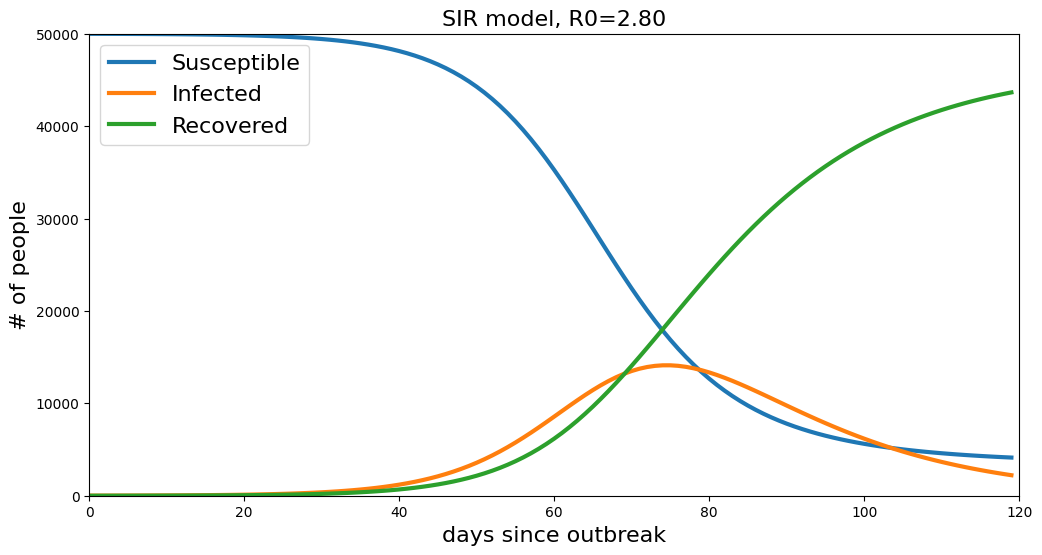

In [547]:
P = 50000 # population
N = 120 # days to simulate
L = 10 # initial infected

R0 = 2.8
gamma = 1 / 14 # recovery rate, approximately 2 weeks of infection
beta = R0 * gamma # infection rate

print('beta is {:.3f}'.format(beta))

S, I, R = SIR_model(P-L, L, 0, N, beta, gamma)

plt.figure(figsize=(12,6))
plot_SIR(S, I, R)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

<span style="color:red">**Task**: Run the SIR model for R0 values of .9, 1.0, 1.5, 2.5, 5 and plot the results. You may want to change the number of days simulated based on the value of R0

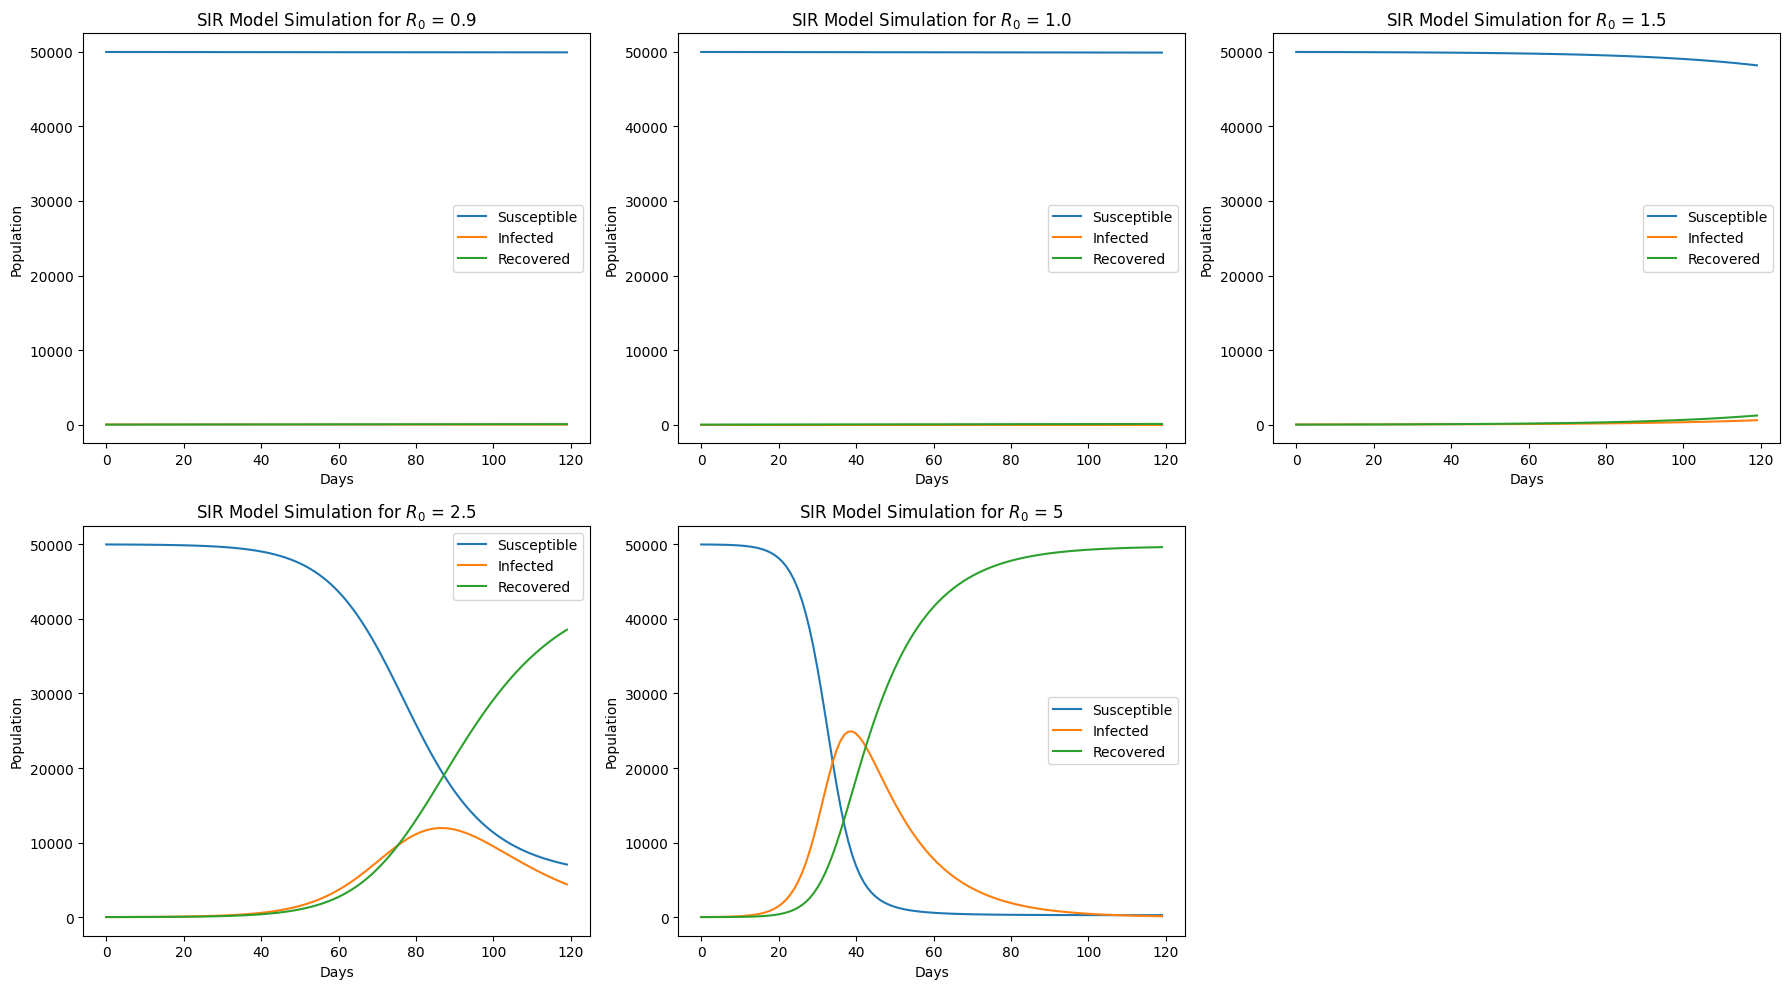

In [548]:
# TODO your code here

# Re-import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Redefining the SIR model function for convenience
def SIR_model(S_init, I_init, R_init, N, beta, gamma):
    S = np.zeros((N,))
    I = np.zeros((N,))
    R = np.zeros((N,))
    S[0] = S_init
    I[0] = I_init
    R[0] = R_init
    for n in range(1, N):
        S[n] = S[n-1] - beta * S[n-1] * I[n-1] / P
        I[n] = I[n-1] + beta * S[n-1] * I[n-1] / P - gamma * I[n-1]
        R[n] = R[n-1] + gamma * I[n-1]
    return S, I, R

def plot_SIR(S, I, R, R0):
    plt.plot(S, label="Susceptible")
    plt.plot(I, label="Infected")
    plt.plot(R, label="Recovered")
    plt.title(f"SIR Model Simulation for $R_0$ = {R0}")
    plt.xlabel("Days")
    plt.ylabel("Population")
    plt.legend()

P = 50000  
N = 120  
I_init = 10  
R_init = 0 
S_init = P - I_init - R_init  
gamma = 1/14  

# List of R0 values to simulate
R0_values = [0.9, 1.0, 1.5, 2.5, 5]

plt.figure(figsize=(18, 10))

for i, R0 in enumerate(R0_values):
    beta = R0 * gamma  # Infection rate
    S, I, R = SIR_model(S_init, I_init, R_init, N, beta, gamma)
    plt.subplot(2, 3, i+1)
    plot_SIR(S, I, R, R0)

plt.tight_layout()
plt.show()


**Q:** For what values of $R_0$ will no spread occur and why?

<span style="color:blue">**A:** ToDo

Since each ill individual only infects a tiny number of people throughout their infectious time, there won't be any spread when R0<=1. Consequently, the virus will eventually become extinct and cease to propagate.

### Travis County statistics
Travis County has an estimated population of 1.3 million. Based on the UT COVID-19 Modeling Consortium report, Travis County has a COVID-19 reproduction rate of approximately $R_0=2.8$, and roughly 3600 hospital beds available for treating COVID-19 patients. 

Run the simulation with the Travis County numbers and plot the result for six months. Assume 10 initial infections. You can use the plotting code below to also plot the number of hospital beds and # of hospitalizations. Assume the hospitalization rate is 2% of all infected individuals. You may want to change the y-axis limits to better visualize the hospitalizations. 


In [549]:
def plot_SIR_icu(S, I, R, H, icu_rate):
    P = S[0] + I[0] + R[0]
    N = len(S)
    plt.plot(S, linewidth=3)
    plt.plot(I, linewidth=3)
    plt.plot(R, linewidth=3)
    plt.plot(range(N), I*icu_rate, linewidth=3)
    plt.plot(range(N), H*np.ones((N,)), 'k--', linewidth=3)
    plt.legend(('Susceptible', 'Infected', 'Recovered', 'ICU cases', 'Hospital Beds'), fontsize=16)
    plt.ylabel('# of people', fontsize=16)
    plt.xlabel('days since outbreak', fontsize=16)
    plt.xlim([0, N])
    plt.ylim([0, P])

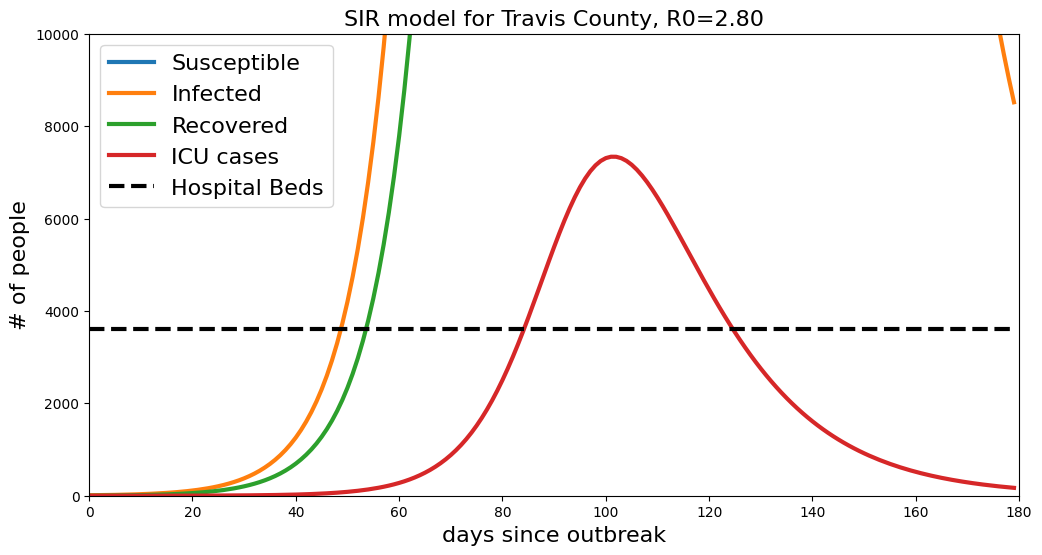

In [550]:
P = 1.3e6
N = 180 
L = 10 
R0 = 2.8
gamma = 1 / 14 
beta = R0 * gamma 
S, I, R = SIR_model(P-L, L, 0, N, beta, gamma)
H = 3600 
icu_rate = .02 

plt.figure(figsize=(12,6))
plot_SIR_icu(S, I, R, H, icu_rate)
plt.ylim([0, 10e3])
plt.title('SIR model for Travis County, R0={:.2f}'.format(R0), fontsize=16);

**Q:** How many weeks will it take before the hospital system is overwhelmed?

<span style="color:blue">**A:** TODO.

The ICU caseload will surpass the available hospital beds after 85 days, or around 12 weeks, at which point the hospital system will reach capacity.

<span style="color:red">**TASK**: Write a function that returns the number of days it will take before the hospital system is overwhelmed. This function would take the Infectious group, the Hospital beds, and the hospitalization rate, and return an integer `N` indicating the first day the hospitals are overwhelmed. If the hospitals are never overwhelmed, return -1

In [551]:
def days_before_SHTF(I, H, icu_rate):
    """
    Calculates number of days before hopsitals are overwhelmed, i.e. shit hits the fan.
    I: number of infected at day n
    H: number of available hospital beds
    icu_rate: percent of infected that require hospitalization
    return: # days, or -1 if never overwhelmed
    """
    # TODO your code here
    for day, infected in enumerate(I):
        if infected * icu_rate > H:
            return day
    return -1
# Parameters
N = 180
P = 1.3e6
initial_infected = 10
initial_recovered = 0
R0 = 2.8
H = 3600
icu_rate = 0.02
gamma = 1 / 14  
beta = R0 * gamma

In [552]:
n = days_before_SHTF(I, H, icu_rate)
print('Days before hospitals are overwhelmed: {}'.format(n))

Days before hospitals are overwhelmed: 85


Does your function match with your previous answer?

### Social distancing
We can extend the SIR model to include the effect of social distancing by introducing an "effectiveness" parameter $\mu \in [0, 1]$ that represents a decrease in the infection rate. $\mu=0$ corresponds to no impact, and $\mu=1$ corresponds to full transmission reduction. In this case, the new model is the following:

\begin{align*}
S[n] & = S[n-1] -(1-\mu)\frac{\beta}{P}S[n-1] I[n-1] \\
I[n] & = I[n-1] + (1-\mu)\frac{\beta}{P}S[n-1] I[n-1] - \gamma I[n-1]\\
R[n] &= R[n-1] + \gamma I[n-1]
\end{align*} 

<span style="color:red">**Task**: Modify the SIR function to include the parameter $\mu$.

In [553]:
def SIR_mu_model(S_init, I_init, R_init, N, beta, gamma, mu=0):
    """
    SIR Model with social distancing.
    S_init: initial # of recovered
    S_init: initial # of susceptible
    I_init: initial # of infected
    N: # of time steps
    beta: infection rate
    gamma: recovery rate
    mu: effectiveness of social distancing
    """

    # TODO your code here
    R = np.zeros((N,))
    I = np.zeros((N,))
    S = np.zeros((N,))

    I[0] = I_init
    S[0] = S_init
    R[0] = R_init

    for n in range(1, N):
        S[n] = S[n-1] - (1 - mu) * beta * S[n-1] * I[n-1] / P
        I[n] = I[n-1] + (1 - mu) * beta * S[n-1] * I[n-1] / P - gamma * I[n-1]
        R[n] = R[n-1] + gamma * I[n-1]

    return R, I, S

Let's assume that social distancing takes effect 2 months after the onset of the disease, and that it is 50% effective. First, run the SIR model without social distancing for 2 months. Then, set $\mu$ to 0.5 and run the model for an additional 4 months. Plot your result as a single plot over six months. Include the hospitalization statistics in the plot. In this scenario, we are assuming that January 1 represents the start of infections, and that March-June we maintain social distancing with an "effectiveness" of 50%.

Tip 1: After running the model once with one set of parameters, you can run the model a second time using the last values of the first run as the new initial conditions

Tip 2: If you run the simulator twice, you can concatenate the results using `np.concatenate((array_1, array_2))`.

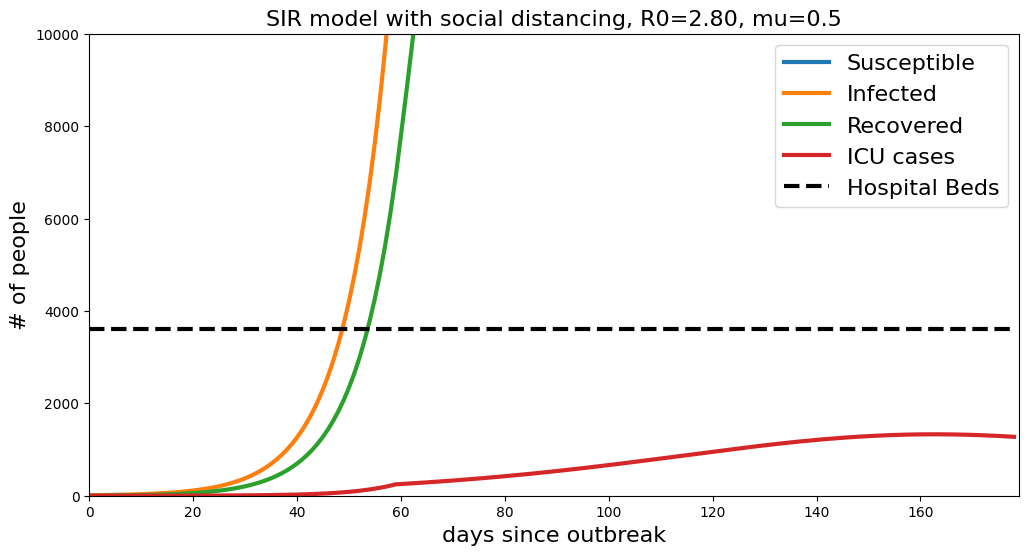

In [554]:
# TODO your code here
gamma = 1 / 14
P = 1.3e6
N1 = 60
R0 = 2.8
beta = R0 * gamma

H = 3600
S, I, R = SIR_model(P - 10, 10, 0, N1, beta, gamma)
icu_rate = 0.02

mu = 0.5
N2 = 120

S_distancing, I_distancing, R_distancing = SIR_mu_model(S[-1], I[-1], R[-1], N2, beta, gamma, mu)

# Combine results
S_combined = np.concatenate([S, S_distancing[1:]])
I_combined = np.concatenate([I, I_distancing[1:]])
R_combined = np.concatenate([R, R_distancing[1:]])

# Plot results
plt.figure(figsize=(12, 6))
plot_SIR_icu(S_combined, I_combined, R_combined, H, icu_rate)
plt.ylim([0, 10e3])
plt.title('SIR model with social distancing, R0={:.2f}, mu={}'.format(R0, mu), fontsize=16)
plt.show()


In [555]:
n = days_before_SHTF(I, H, icu_rate)
print('Days before hospitals are overwhelmed: {}'.format(n))

Days before hospitals are overwhelmed: -1


**Q**: Explain what you observe. Did we "flatten the curve"?

<span style="color:blue">**A:** ToDO

The curvature flattens out. It seems that this strategy did not overload the hospitals. An additional forty days helped to curb the rise in ICU cases so that the hospitals could manage them.

### "Re-opening the economy"

According to Gov. Abott's order [1], the following is the timeline for re-opening Texas:
- May 1: Texas restaurants, retail stores, malls, movie theaters and museums are allowed to reopen at 25% capacity.
- May 8: Salons, barbershops, nail salons and tanning salons may reopen. These businesses must operate with one customer per stylist. If customers are waiting inside, they must stay six feet apart; otherwise, customers should wait outside. Stations must be six feet apart and the governor recommends that customers and stylists wear face masks.
- May 11: Phase three begins and aims to build a team of 4,000 contact tracers.
- May 18: Gyms and other exercise facilities may reopen, as long as they meet the 25% capacity requirement. Showers and locker rooms must remain closed and equipment must be disinfected. Gym customers should wear gloves that cover the entire hand and fingers. Customers at gyms also must be six feet apart. Non-essential manufacturers may also reopen on May 18. Phase two could allow even more businesses to reopen and expand the capabilities of phase one businesses by this date.

Let's now investigate what happens if we re-open the economy according to this plan. We will assume that May 1 represents 2 months of inaction (January, February), followed by 2 months of social distancing (March, April). It is difficult to model the rollout phase with our simple SIR+mu model. To simplify, we will assume that if the economy reopens to 25% capacity, this translates to a social distancing effectiveness of $0.25 \times \mu$, and we will ignore the slow rollout.

[1] https://www.kvue.com/article/news/health/coronavirus/gov-greg-abbott-economic-plan-timeline/269-a548f51a-1729-48ab-a63a-afeb8b4426ff

<span style="color:red">**Task:** Simulate the effect of 60 days without social distancing, followed by 60 days with 50% social distancing, followed by 60 days with re-opening the economy. Plot the result for the six months.

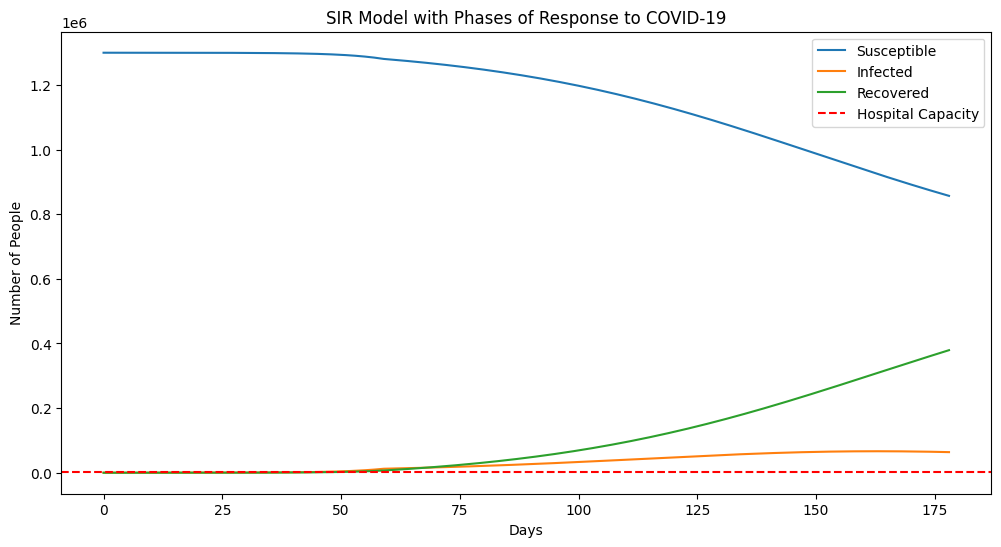

Days before hospitals are overwhelmed: Never


In [556]:
# TODO
population_size = 1.3e6 
initial_days_without_measures = 60  
reproduction_rate = 2.8 
daily_recovery_rate = 1 / 14  
daily_infection_rate = reproduction_rate * daily_recovery_rate  

initial_susceptible = population_size - 10  
initial_infected = 10  
initial_recovered = 0  

hospital_capacity = 3600  
icu_admission_rate = 0.02  

susceptible_first_phase, infected_first_phase, recovered_first_phase = SIR_model(
    initial_susceptible, initial_infected, initial_recovered, initial_days_without_measures,
    daily_infection_rate, daily_recovery_rate
)

social_distancing_effectiveness = 0.5
social_distancing_duration = 60
susceptible_second_phase, infected_second_phase, recovered_second_phase = SIR_mu_model(
    susceptible_first_phase[-1], infected_first_phase[-1], recovered_first_phase[-1],
    social_distancing_duration, daily_infection_rate, daily_recovery_rate, social_distancing_effectiveness
)

reopening_effectiveness = 0.25  
reopening_duration = 60
susceptible_third_phase, infected_third_phase, recovered_third_phase = SIR_mu_model(
    susceptible_second_phase[-1], infected_second_phase[-1], recovered_second_phase[-1],
    reopening_duration, daily_infection_rate, daily_recovery_rate, reopening_effectiveness
)

total_susceptible = np.concatenate([susceptible_first_phase, susceptible_second_phase[1:], susceptible_third_phase[1:]])
total_infected = np.concatenate([infected_first_phase, infected_second_phase[1:], infected_third_phase[1:]])
total_recovered = np.concatenate([recovered_first_phase, recovered_second_phase[1:], recovered_third_phase[1:]])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(S_combined, label='Susceptible')
plt.plot(I_combined, label='Infected')
plt.plot(R_combined, label='Recovered')
plt.axhline(y=H, color='r', linestyle='--', label='Hospital Capacity')
plt.xlabel('Days')
plt.ylabel('Number of People')
plt.title('SIR Model with Phases of Response to COVID-19')
plt.legend()
plt.show()

# Check for hospital system overwhelm
n = days_before_SHTF(I_combined, H, icu_rate)
print(f'Days before hospitals are overwhelmed: {n if n != -1 else "Never"}')


In [557]:
n = days_before_SHTF(I, H, icu_rate)
print('Days before hospitals are overwhelmed: {}'.format(n))

Days before hospitals are overwhelmed: -1


**Q**: Explain what you observe

<span style="color:blue">**A:** TODO.

Assuming we heed the advice of Austin Mayor Steve Adler rather than the Governor's directives, let's extend the social distance order until June 10. To take into consideration an extra 40 days of social separation, rerun the simulation.

Suppose that instead of following the Governor's orders, we instead follow the recommendations of Mayor Steve Adler of Austin and continue the social distancing order through June 10. Rerun the simulation to account for an additional 40 days of social distancing.

NameError: name 'mu_extended' is not defined

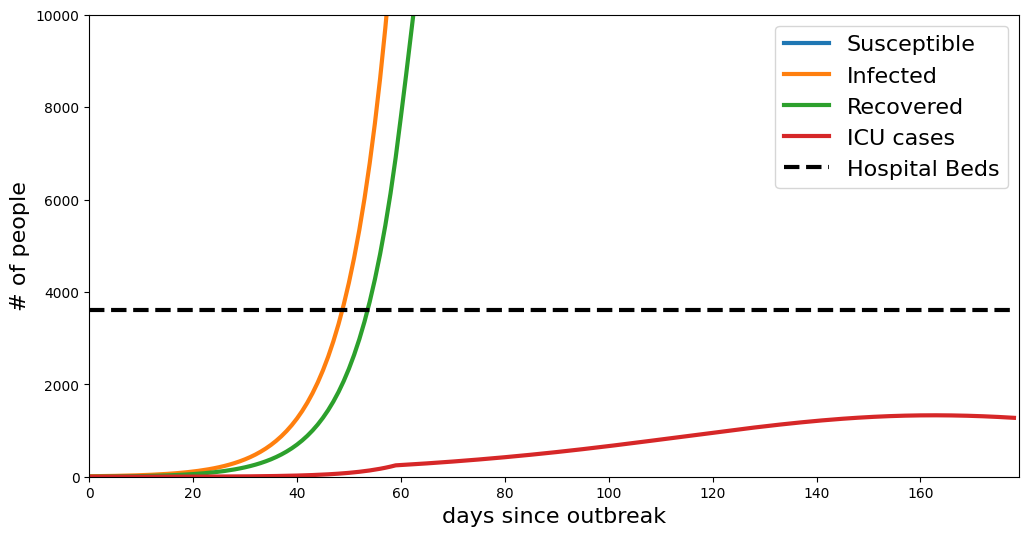

In [558]:
### TODO
population_total = 1.3e6
initial_infected = 10
initial_recovered = 0
basic_reproduction_number = 2.8
recovery_rate = 1 / 14
infection_rate = basic_reproduction_number * recovery_rate
hospital_beds = 3600
hospitalization_rate = 0.02

social_distancing_effectiveness = 0.5
extended_social_distancing_effectiveness = 0.5

initial_period_days = 60
social_distancing_period_days = 60
extended_period_days = 40

susceptible_initial, infected_initial, recovered_initial = SIR_model(
    population_total - initial_infected, initial_infected, initial_recovered,
    initial_period_days, infection_rate, recovery_rate
)

susceptible_social_distancing, infected_social_distancing, recovered_social_distancing = SIR_mu_model(
    susceptible_initial[-1], infected_initial[-1], recovered_initial[-1],
    social_distancing_period_days, infection_rate, recovery_rate, social_distancing_effectiveness
)

susceptible_extended, infected_extended, recovered_extended = SIR_mu_model(
    susceptible_social_distancing[-1], infected_social_distancing[-1], recovered_social_distancing[-1],
    extended_period_days, infection_rate, recovery_rate, extended_social_distancing_effectiveness
)

combined_susceptible = np.concatenate([susceptible_initial, susceptible_social_distancing[1:], susceptible_extended[1:]])
combined_infected = np.concatenate([infected_initial, infected_social_distancing[1:], infected_extended[1:]])
combined_recovered = np.concatenate([recovered_initial, recovered_social_distancing[1:], recovered_extended[1:]])
# Plot results
plt.figure(figsize=(12, 6))
plot_SIR_icu(S_combined, I_combined, R_combined, H, icu_rate)
plt.ylim([0, 10e3])
plt.title('SIR model with continued social distancing, R0={:.2f}, mu={}'.format(R0, mu_extended), fontsize=16)
plt.show()

In [ ]:
n = days_before_SHTF(I, H, icu_rate)
print('Days before hospitals are overwhelmed: {}'.format(n))

**Q**: Explain what you observe

<span style="color:blue">**A:** TODO.

The curvature flattens out. It seems that this strategy did not overload the hospitals. An additional forty days helped to curb the rise in ICU cases so that the hospitals could manage them.


### Model sensitivity
All predictions are only as good as their modeling assumptions. You may have noticed that our measures just barely avoided overwhelming the hospital. But what happens if we change a parameter by a small amount? For instance, if we change the starting number of infections, or the social distancing effectiveness, or the infection rate? Model sensitivity tells us how much our model will change when a parameter changes slightly, and indicates how susceptible it is to inaccuracies in data, etc. In other words, any time you see a model, you should take it with a grain of salt!


### Improving the model
Of course, the SIR model we explored is highly simplistic. Among its limitations are the following:
- does not account for incubation period
- does not model severity of infection across population subgroups
- does not model the difference between recovered and removed
- does not consider risk of reinfection

Instead of developing a mathematical model and running the difference equations, we could instead build a simulation environment and observe the different policy effects. Our simulation will need to make assumptions of how poeple behave. For instance, it is common to model people as "random walks" (similar to gas particles), i.e. we assume that people move around the world randomly, and when they collide with an infected person, they have a chance of spreading the infection and moving in a new direction. 

Recently, The Washington Post has an excellent interactive article explaining these ideas with simple simulators.

https://www.washingtonpost.com/graphics/2020/world/corona-simulator/

Based off of this idea, Paul van Gent's created a similar simulator in Python. Although we will not run it for this assignment, I highly recommend downloading the code and trying it out:

https://github.com/paulvangentcom/python_corona_simulation

**Task:** Watch the 3Blue1Brown video on simulating epidemics. It is a great video to watch with intuitive visualizations of different policies, including simulating multiple cities with city center hubs:

https://youtu.be/gxAaO2rsdIs?t=1

**Task:** After watching the video, briefly discuss your observations and conclusions.

<span style="color:blue">**A:** (TODO)


The number of sick individuals can be significantly impacted by even modest changes in social connections. The models show that a key factor in flattening the curve and slowing the spread of viruses is social distance. The viruses that spread quickly and kill a small number of individuals but take a long time to exhibit symptoms are the most deadly because they make it difficult to tell who is infected from who right away. The number of infections increased quickly when the simulation included places like stores or schools. The curve is flattened by social distance, while the spread is prolonged by flaws. Since no one treatment will completely eradicate the disease, a combination of strategies include social distance, isolation, reducing travel, and improving cleanliness can help minimize its spread.
